<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Hair_Style_Recognition/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.0 MB/s eta 0:0

In [18]:
from fastai.vision.all import *

In [15]:
#!exoprt
from fastai.vision.all import load_learner
import gradio as gr
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Hair Styles

/content/drive/My Drive/Hair Styles


In [5]:
#!exoprt
model = load_learner(f'models/hair_style_v3.pkl')

In [32]:
#!exoprt
hair_styles=[
    'Afro',
    'Bangs',
    'Bob Hair',
    'Bowl cut',
    'Bun Style',
    'Combover hair',
    'Crew cut', 'Crown braid',
    'Curly',
    'Dreadlocks',
    'Feathered hair',
    'French braid',
    'Long wavy hair',
    'Medium length hair',
    'Mohawk',
    'Mullet',
    'Pigtail Hair',
    'Pixie cut',
    'Plaits hair',
    'Ponytail hair',
    'Ringlets Hair',
    'Spiky hair'
]

def recognize_image(image):
  pred, idx, probs=model.predict(image)
  return dict(zip(hair_styles, map(float, probs)))

#model.predict(f'{img_path}/1.jpg')

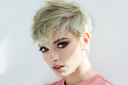

In [33]:
img = Image.open(f'images_for_inference/2.jpg')
img.to_thumb(128,128)

In [34]:
recognize_image(img)

{'Afro': 6.6175807660329156e-06,
 'Bangs': 3.434752215980552e-05,
 'Bob Hair': 0.00039640750037506223,
 'Bowl cut': 0.0008102090214379132,
 'Bun Style': 0.0009272514143958688,
 'Combover hair': 1.3197658518038224e-05,
 'Crew cut': 0.00012143298226874322,
 'Crown braid': 0.0002687062369659543,
 'Curly': 4.322395761846565e-05,
 'Dreadlocks': 1.3257287719170563e-05,
 'Feathered hair': 3.654740794445388e-05,
 'French braid': 5.3577030485030264e-05,
 'Long wavy hair': 4.066407200298272e-06,
 'Medium length hair': 3.964963184444059e-07,
 'Mohawk': 0.0001631543127587065,
 'Mullet': 4.6811495849397033e-05,
 'Pigtail Hair': 2.8613520044018514e-05,
 'Pixie cut': 0.9945006370544434,
 'Plaits hair': 3.4966476505360333e-06,
 'Ponytail hair': 3.5230692446930334e-05,
 'Ringlets Hair': 1.0031969395640772e-05,
 'Spiky hair': 0.002482683164998889}

In [35]:
!#export
image=gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples=['images_for_inference/2.jpg',
          'images_for_inference/3.jpg',
          'images_for_inference/4.jpg',
          'images_for_inference/5.jpg']


iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4dd7fc8c50deebe9de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
